# System Threat Forecaster – Malware Prediction

## Project Overview
The objective of this project is to build a machine learning model that predicts
the likelihood of a Windows machine being infected by malware.

The dataset consists of detailed system telemetry, including hardware
specifications, operating system information, and security configuration
features. This is a real-world, high-dimensional classification problem with
significant data quality challenges such as missing values, high-cardinality
categorical variables, and temporal features.

## Problem Type
- Binary Classification
- Target Variable:
  - **1** → Machine is infected
  - **0** → Machine is not infected

The training dataset contains both features and labels, while the test dataset
contains only features. The goal is to generalize well to unseen systems.


In [44]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Loading the Dataset

Two datasets are provided:
- **train.csv**: Contains system features along with the target label
- **test.csv**: Contains system features without labels

The datasets are loaded using pandas for further analysis and preprocessing.


In [45]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [46]:
print(train_df.shape)
print(test_df.shape)

(100000, 76)
(10000, 75)


In [47]:
train_df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


## Dataset Structure and Overview

Each row in the dataset represents a unique machine.
The dataset contains a mix of:
- Numerical features (e.g., RAM size, disk capacity)
- Categorical features (e.g., OS version, antivirus product)
- Temporal features (e.g., malware signature dates)

This variety makes preprocessing and feature engineering critical.


In [48]:
train_df.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


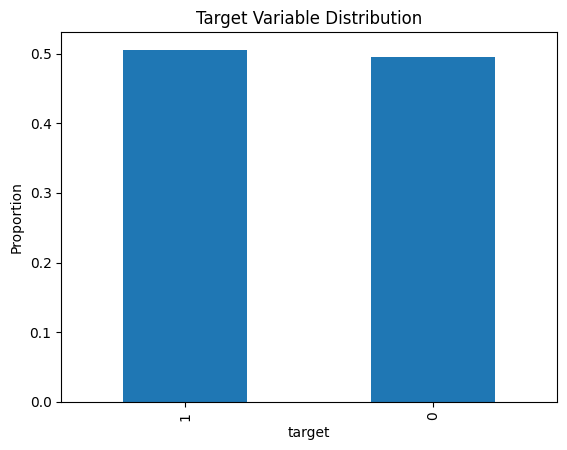

In [49]:
target_dist = train_df["target"].value_counts(normalize=True)

plt.figure()
target_dist.plot(kind="bar")
plt.title("Target Variable Distribution")
plt.ylabel("Proportion")
plt.show()


### Target Variable Distribution

The target variable is reasonably balanced, with only a small difference
between infected and non-infected machines.

Due to this near-balance, no oversampling or undersampling techniques
were applied. However, AUC is still preferred over accuracy for evaluation.

In [50]:
train_df.info() #Found null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

### Distribution of Numerical Features

The following histogram shows the distribution of numerical features
present in the dataset. Many features exhibit skewed distributions and
varying scales, reinforcing the need for scaling and robust imputation.


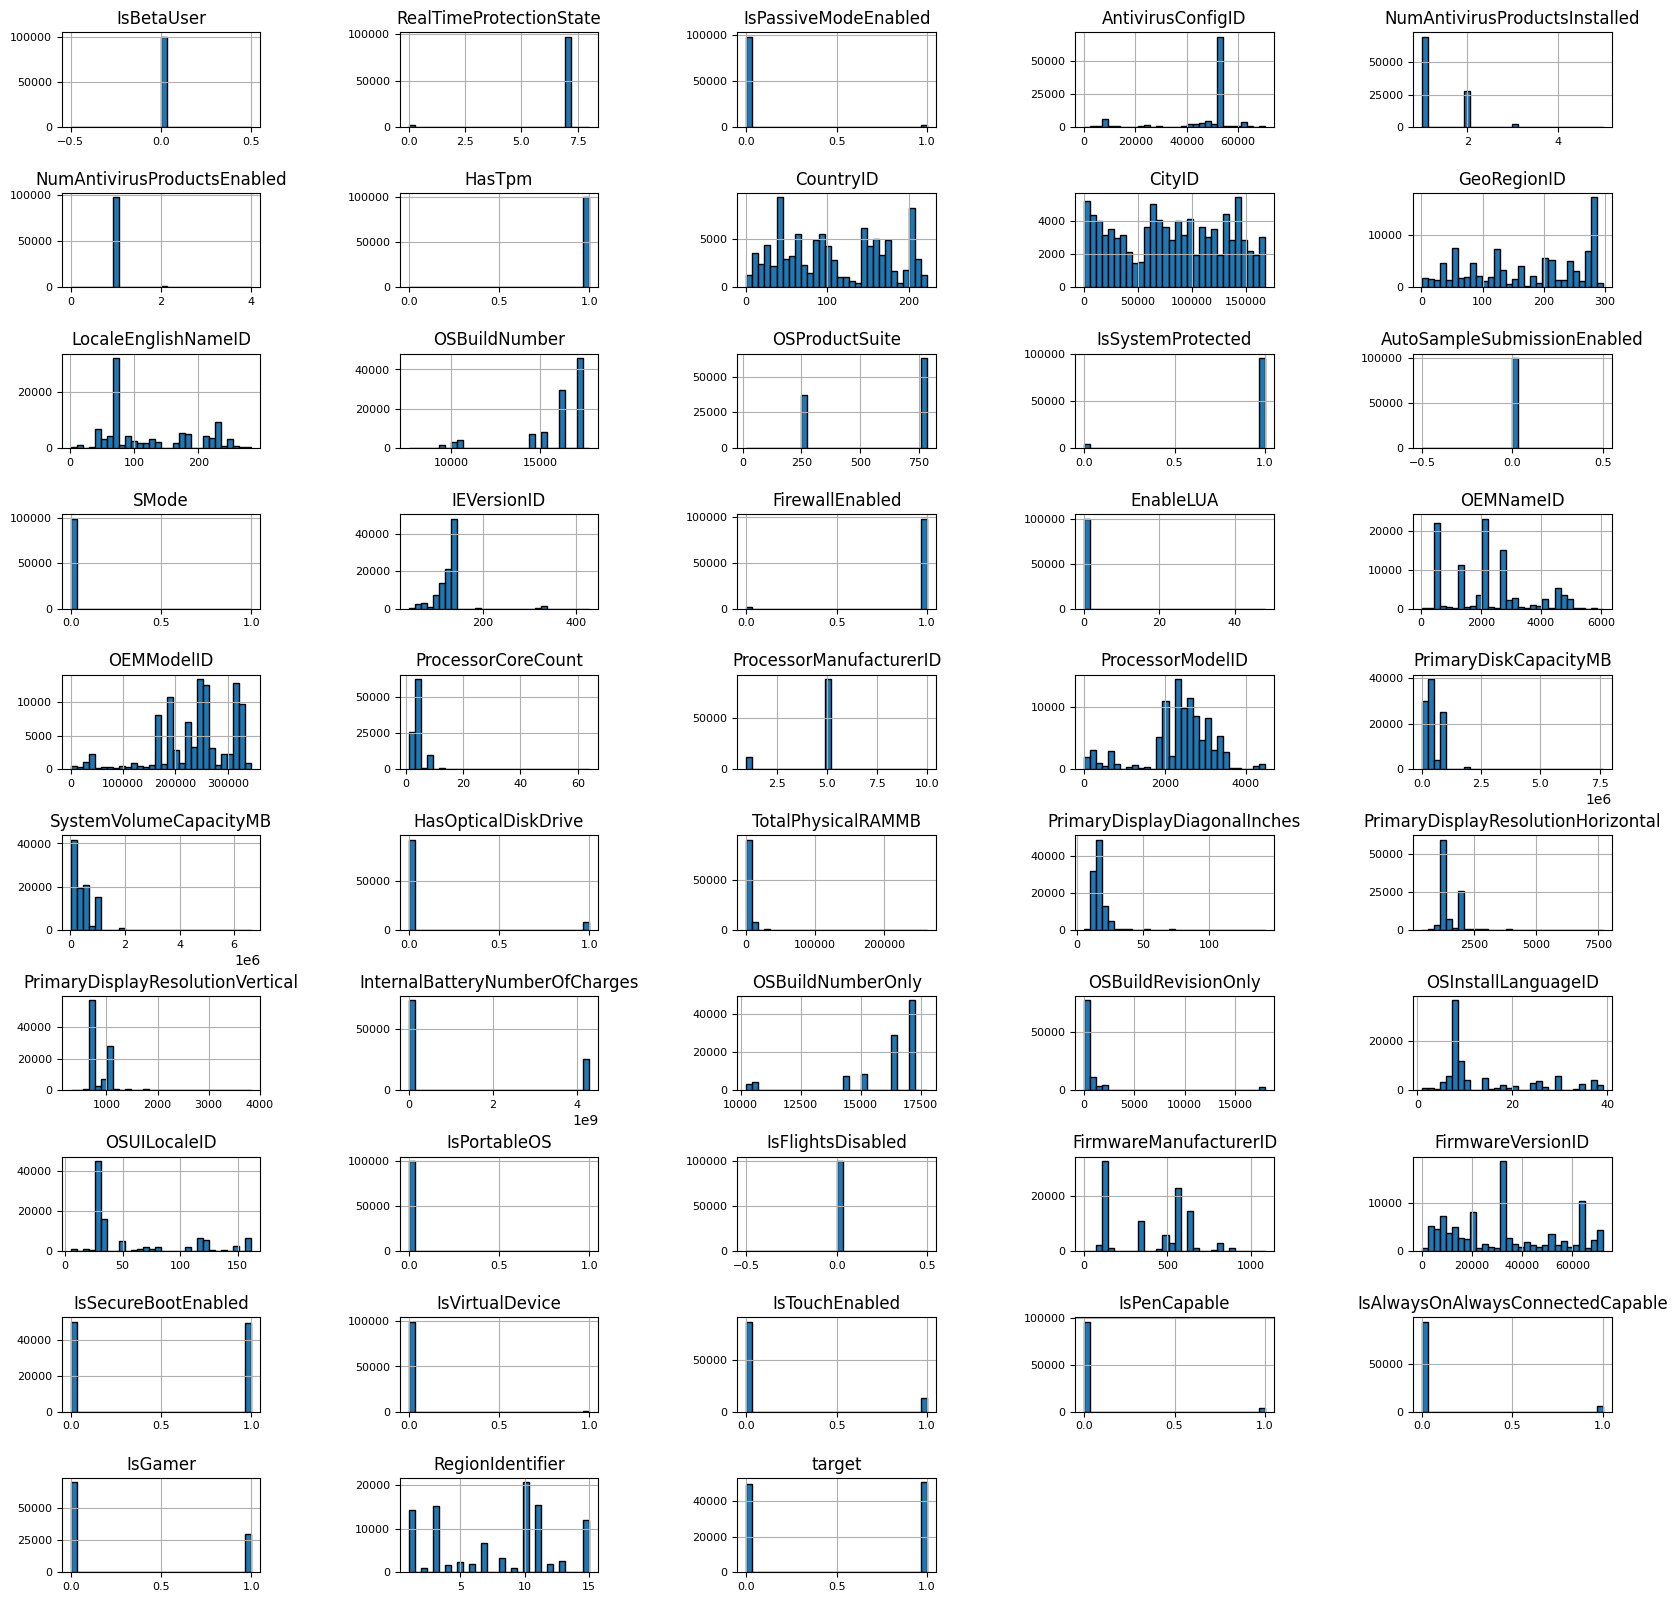

In [51]:
train_df.hist(figsize=(20, 20), bins=30, edgecolor="black", xlabelsize=8, ylabelsize=8, layout=(10, 5))
plt.subplots_adjust(hspace=0.7, wspace=0.7)

### Missing Value Analysis

Missing values arise due to hardware differences, optional OS features,
and incomplete telemetry collection. Understanding missingness helps
design appropriate imputation strategies.


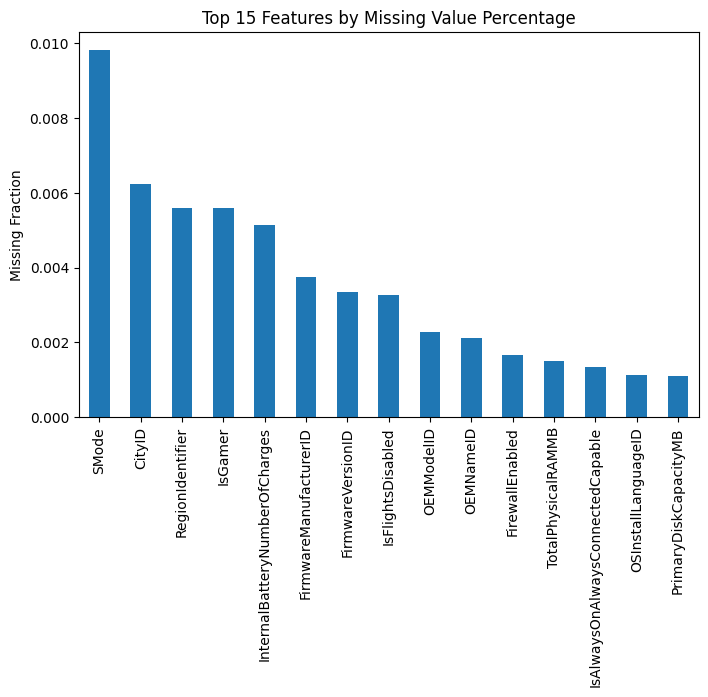

In [52]:
missing_fraction = train_df.isna().mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
missing_fraction.head(15).plot(kind="bar")
plt.title("Top 15 Features by Missing Value Percentage")
plt.ylabel("Missing Fraction")
plt.show()

Some features like AutoUpdateOptionsName , PrimaryDiskType contain a significant proportion of missing values.
Rather than dropping these features, domain-aware imputation strategies
(mean, median, or mode) are applied depending on feature type.

### Handling Placeholder Categories

Several categorical features contain placeholder values such as
"UNKNOWN" and "Unspecified". These values do not provide meaningful
information and are treated as missing values.


In [53]:
# Replacing UNKNOWN and unspecified values with NA
train_missing_columns =  train_df.columns[train_df.isin(["UNKNOWN",'Unspecified']).any()].to_list()
train_df[train_missing_columns] = train_df[train_missing_columns].replace(["UNKNOWN", "Unspecified"], np.nan)

test_missing_columns =  test_df.columns[test_df.isin(["UNKNOWN",'Unspecified']).any()].to_list()
test_df[test_missing_columns] = test_df[test_missing_columns].replace(["UNKNOWN", "Unspecified"], np.nan)

In [54]:
train_df  = train_df.drop_duplicates()
train_df.shape[0]

99835

### Duplicate Records

Duplicate rows may arise due to repeated telemetry collection.
Removing duplicates helps prevent model bias and data leakage.


In [55]:
train_df = train_df.drop_duplicates()

## Categorical Feature Cardinality

Many categorical features have very high cardinality, such as OS versions
and antivirus signature versions. Encoding strategies must balance
information retention and dimensionality.

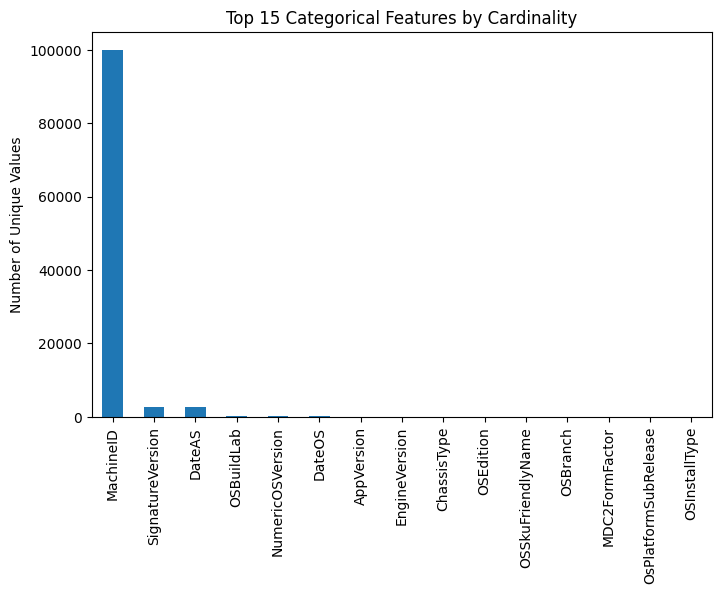

In [56]:
cat_cardinality = train_df.select_dtypes(include="object").nunique().sort_values(ascending=False)

plt.figure(figsize=(8,5))
cat_cardinality.head(15).plot(kind="bar")
plt.title("Top 15 Categorical Features by Cardinality")
plt.ylabel("Number of Unique Values")
plt.show()


High-cardinality features are encoded using ordinal encoding, while
low-cardinality features are one-hot encoded to avoid excessive feature
explosion.


## Feature–Target Relationship Analysis

To better understand the factors associated with malware infection,
we analyze the relationship between selected high-impact features and
the target variable. These features were chosen based on domain relevance
(security, hardware, and OS configuration).

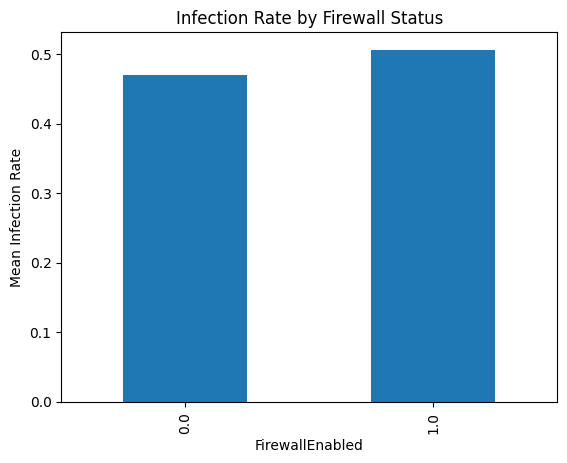

In [57]:
firewall_target = (
    train_df.groupby("FirewallEnabled")["target"]
    .mean()
    .sort_index()
)

plt.figure()
firewall_target.plot(kind="bar")
plt.title("Infection Rate by Firewall Status")
plt.ylabel("Mean Infection Rate")
plt.show()


Interestingly, machines with the firewall enabled show a slightly higher
average infection rate compared to those without firewall enabled.

This counterintuitive pattern suggests that firewall status alone is not
sufficient to prevent infections and may act as a proxy for other factors
such as user behavior, system exposure, or reporting bias. It also highlights
that security features must be analyzed in combination rather than isolation.

### IsSystemProtected

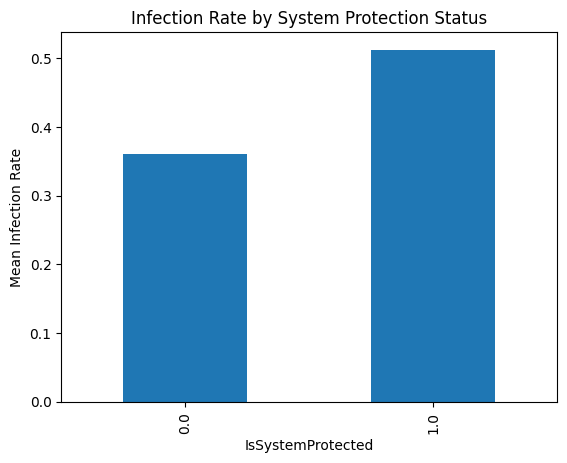

In [58]:
protection_target = (
    train_df.groupby("IsSystemProtected")["target"]
    .mean()
    .sort_index()
)

plt.figure()
protection_target.plot(kind="bar")
plt.title("Infection Rate by System Protection Status")
plt.ylabel("Mean Infection Rate")
plt.show()


Machines marked as system-protected exhibit a higher infection rate.
This may indicate that protection mechanisms are often enabled reactively
after exposure or that higher-risk systems are more likely to have active
protection features enabled.

This reinforces the need for multivariate modeling rather than relying
on individual features for risk assessment.

### TotalPhysicalRAMMB (Histogram by Target)

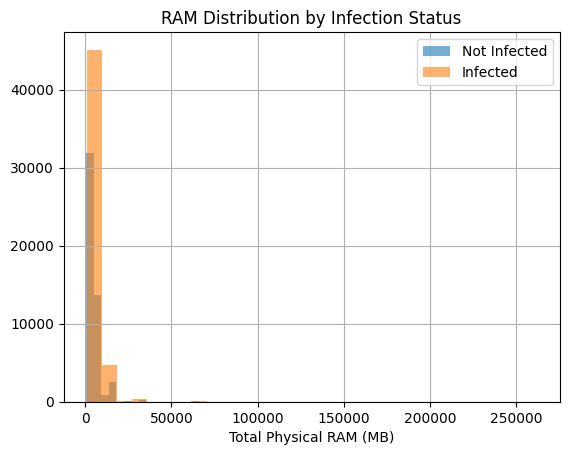

In [59]:
plt.figure()
train_df[train_df["target"] == 0]["TotalPhysicalRAMMB"].hist(alpha=0.6, bins=30, label="Not Infected")
train_df[train_df["target"] == 1]["TotalPhysicalRAMMB"].hist(alpha=0.6, bins=30, label="Infected")
plt.legend()
plt.title("RAM Distribution by Infection Status")
plt.xlabel("Total Physical RAM (MB)")
plt.show()


Infected machines tend to have lower physical RAM compared to non-infected
machines. This suggests that lower-end systems may be more vulnerable to
malware due to outdated hardware, limited resources, or reduced security
support.

The heavy skewness further justifies the use of tree-based models that are
robust to non-normal feature distributions.

### ProcessorCoreCount vs Target

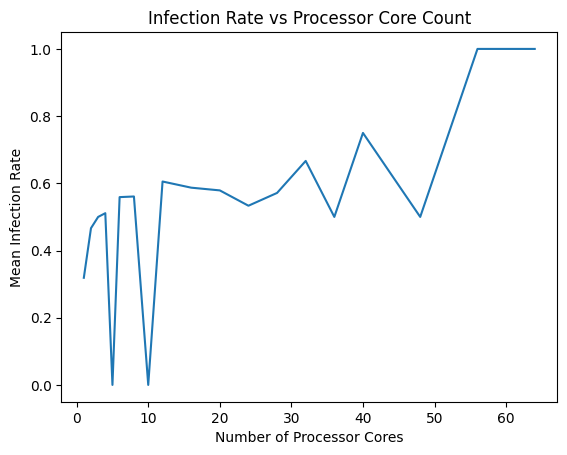

In [60]:
core_target = (
    train_df.groupby("ProcessorCoreCount")["target"]
    .mean()
)

plt.figure()
core_target.plot(kind="line")
plt.title("Infection Rate vs Processor Core Count")
plt.ylabel("Mean Infection Rate")
plt.xlabel("Number of Processor Cores")
plt.show()


The relationship between processor core count and infection rate is noisy,
especially at higher core counts. This is likely due to a small number of
samples in those ranges, leading to unstable mean estimates.

While lower core-count systems appear more vulnerable on average, this
feature is expected to contribute predictive value primarily through
interaction with other hardware and OS features rather than independently.

### OSArchitecture

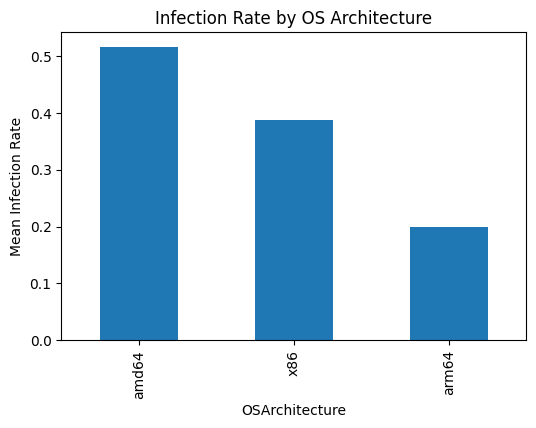

In [61]:
os_arch_target = (
    train_df.groupby("OSArchitecture")["target"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
os_arch_target.plot(kind="bar")
plt.title("Infection Rate by OS Architecture")
plt.ylabel("Mean Infection Rate")
plt.show()


Infection rates vary significantly across OS architectures.
Traditional desktop architectures such as amd64 and x86 show higher
infection rates, while arm64 systems appear less affected.

This may reflect differences in usage patterns, software ecosystems,
and malware targeting preferences.

### Malware Signature Recency

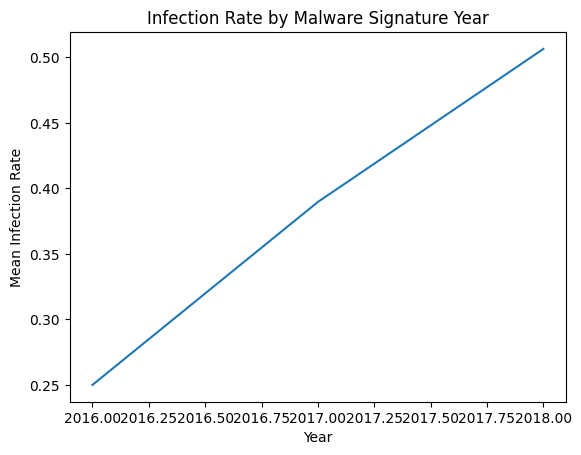

In [63]:
train_df["DateAS_date"] = pd.to_datetime(train_df["DateAS"], errors="coerce")

train_df["DateAS_year"] = train_df["DateAS_date"].dt.year

year_target = (
    train_df.groupby("DateAS_year")["target"]
    .mean()
)

train_df.drop(columns=["DateAS_date","DateAS_year"], inplace=True)

plt.figure()
year_target.plot(kind="line")
plt.title("Infection Rate by Malware Signature Year")
plt.ylabel("Mean Infection Rate")
plt.xlabel("Year")
plt.show()


The increasing infection rate for more recent malware signature years
likely reflects the evolving and growing sophistication of malware rather
than reduced protection.

This trend highlights the dynamic nature of cybersecurity threats and
underscores the importance of continuous model retraining and up-to-date
security intelligence.

## Feature Description (High-Level)

The dataset contains features describing:

- **System Identity**: MachineID
- **Antivirus Configuration**: ProductName, EngineVersion, SignatureVersion
- **Security Settings**: FirewallEnabled, IsSystemProtected, HasTpm
- **Hardware Specifications**: RAM, Disk Capacity, Processor Details
- **Operating System Metadata**: OSVersion, OSBuildNumber, OSArchitecture
- **Geographical Information**: CountryID, CityID, RegionIdentifier
- **Temporal Information**: Malware signature and OS update dates

A detailed feature list is provided in the project documentation.

## Summary of EDA Findings

Key observations from exploratory data analysis include:

- The dataset contains a high-dimensional mix of numerical, categorical,
  and temporal features, reflecting real-world system telemetry.
- Missing values are prevalent across multiple features and arise from
  hardware heterogeneity and optional OS configurations, necessitating
  feature-specific imputation strategies.
- Security-related features such as firewall status and system protection
  show non-trivial and sometimes counterintuitive relationships with malware
  infection, highlighting the importance of multivariate modeling.
- Lower hardware capacity systems (e.g., lower RAM and fewer processor cores)
  tend to exhibit higher infection rates, suggesting increased vulnerability
  in older or resource-constrained machines.
- OS architecture influences infection patterns, with traditional desktop
  architectures showing higher infection rates than newer alternatives.
- Temporal features related to malware signatures reveal evolving threat
  dynamics over time, underscoring the need for up-to-date security intelligence.
- Several categorical features exhibit very high cardinality, requiring a
  careful balance between information retention and feature dimensionality.

These insights directly inform the preprocessing, encoding strategies, and
model selection used in the subsequent machine learning pipeline.


## Feature Engineering

In [64]:
train_df.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio